<a href="https://colab.research.google.com/github/Kumarrajbogireddy29/Machine-Learning-/blob/main/Boston_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
from tensorflow.keras.utils import normalize
#We will import all the necessary libraries for the model and We will use the Keras library to load the dataset and preprocess it.
# Load the Boston Housing Price dataset
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
#We will also split the dataset into training and validation sets.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
# Define the neural network architecture
model =Sequential()

In [4]:
model.add(Dense(64, activation='relu', input_shape=(13,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
#The next step is to design the neural network architecture. For this task, we will use a fully connected neural network with an input layer, multiple hidden layers, and an output layer. We will use the Dense class in Keras to add the layers to our model. Since this is a regression problem, the output layer will have only one neuron, and we will not use any activation function
# Compile the model
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
history = model.fit(x_train, y_train,
epochs=100,
batch_size=32,
validation_data=(x_test, y_test))
#After compiling the model, the next step is to train it on the training data. We will use the fit method in Keras to train the model. We will also specify the validation data and the batch size.
# Evaluate the model on the test set
test_loss = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 568.2860 - val_loss: 566.9240
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 516.9473 - val_loss: 508.5954
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 449.4577 - val_loss: 431.6381
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 398.7049 - val_loss: 332.6899
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 275.1608 - val_loss: 223.4777
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 170.5122 - val_loss: 129.6684
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 106.2698 - val_loss: 80.0518
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 60.7563 - val_loss: 61.4660
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 47.7487 - val_loss: 48.0856
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 35.4403 - val_loss: 39.7791
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25.4755 - val_loss: 34.7421
Epoch 12/100
13/13 ━━━━━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.6886
Test loss: 20.428054809570312
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Mean Absolute Error: 2.8400854877397124


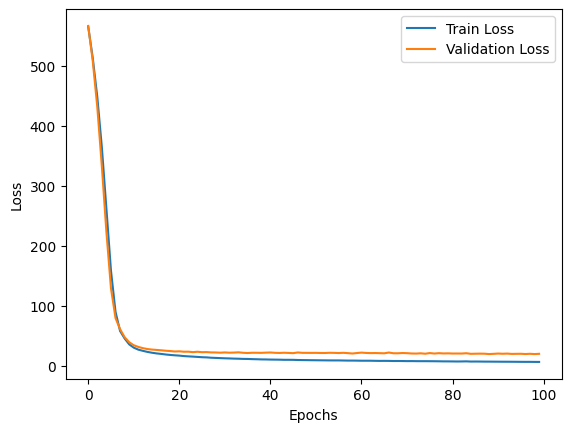

In [8]:
# Evaluate the model on the test set
test_loss = model.evaluate(x_test, y_test)
print('Test loss:', test_loss) #4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.6989 Test loss: 20.150022506713867
#calculate metrics like Mean Absolute Error (MAE) to gain better insights into the model's performance:
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae) #4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step Mean Absolute Error: 2.7723388653175505
#Plot training and validation losses
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()